In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import yaml

from os.path import dirname as up

# Define image parameters

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
with open("../data/resources/rcParams.yaml") as f:
    rcParamsDict = yaml.full_load(f)
    for k in rcParamsDict["rcParams"]:
        print("{} {}".format(k,rcParamsDict["rcParams"][k]))
        plt.rcParams[k] = rcParamsDict["rcParams"][k]
    for k1 in set(list(rcParamsDict)).difference(set(["rcParams"])):
        print("{} {}".format(k1,rcParamsDict[k1]))

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.22.2 scipy==1.6.2 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.8.3
figure.dpi 80
savefig.dpi 500
figure.figsize [10, 10]
axes.facecolor None
figure.facecolor None
dotSize 20


In [3]:
colors_dict = {
'demux_v2_call': "#1f77b4",
'scansnp_w_neg': "#ff7f0e",
'souporcell_call': "#2ca02c",
'vireo_call':"#d62728",
'Consensus':"#17becf"
              }

colors_dict_ndd = {
'demux_v2_call_no_neg_doub': "#1f77b4",
'scansnp_w_neg_no_neg_doub': "#ff7f0e",
'souporcell_call_no_neg_doub': "#2ca02c",
'vireo_call_no_neg_doub':"#d62728",
'Consensus_no_neg_doub':"#17becf"
              }

colors_dict_lineplot = {
'Demuxlet': "#1f77b4",
'SCanSNP': "#ff7f0e",
'SoC': "#2ca02c",
'Vireo':"#d62728",
'Consensus':"#17becf"
              }

# Define paths for precision, recall and doublets score data

In [4]:
precision_dfs_paths = ["../../geneticDemultiplexing/precision_sample1.csv",
          "../../geneticDemultiplexing/precision_sample2.csv",
          ]

recall_dfs_paths = ["../../geneticDemultiplexing/recall_sample1.csv",
          "../../geneticDemultiplexing/recall_sample2.csv",
          ]

DS_rate = ["../../geneticDemultiplexing/sample1_DoubletSinglet_rates.csv",
          "../../geneticDemultiplexing/sample2_DoubletSinglet_rates.csv",
          ]

## Open datasets

In [5]:
precision_dfs = []
for i in precision_dfs_paths:
    precision_dfs.append(pd.read_csv(i, index_col = 0))
    
precision = pd.concat(precision_dfs, keys = ['sample1', 'sample2']).reset_index()
#JI = JI.drop('demux_v1_call', axis = 1)

precision.columns = ['Sample', 'Method'] + precision.columns[2:].tolist()

In [6]:
recall_dfs = []
for i in recall_dfs_paths:
    recall_dfs.append(pd.read_csv(i, index_col = 0))
    
recall = pd.concat(recall_dfs, keys = ['sample1', 'sample2']).reset_index()
#JI = JI.drop('demux_v1_call', axis = 1)

recall.columns = ['Sample', 'Method'] + recall.columns[2:].tolist()

In [7]:
DS_dfs = []
for i in DS_rate:
    DS_dfs.append(pd.read_csv(i, index_col = 0))
    
DS = pd.concat(DS_dfs, keys = ['sample1', 'sample2']).reset_index()
#JI = JI.drop('demux_v1_call', axis = 1)
DS = DS.drop('level_1', axis = 1)

In [8]:
DS

,level_0,Software,Doublet_Rate,Unassigned_rate
0,sample1,Demuxlet,0.250671,0.000000
1,sample1,SCanSNP,0.107736,0.000000
2,sample1,SoC,0.224203,0.027923
3,sample1,Vireo,0.179362,0.079130
4,sample1,Consensus,0.176907,0.059985
5,sample2,Demuxlet,0.252423,0.000000
6,sample2,SCanSNP,0.085330,0.000000
7,sample2,SoC,0.195369,0.030687
8,sample2,Vireo,0.163025,0.086585
9,sample2,Consensus,0.145648,0.061775


In [9]:
DS.columns = ['Sample', 'Method'] + DS.columns[2:].tolist()

In [10]:
total = pd.concat([precision, recall], keys = ['Precision', 'Recall']).reset_index().drop('level_1', axis = 1)
total.columns = ['Metric'] + total.columns[1:].tolist()

In [11]:
total.head()

,Metric,Sample,Method,MultiSeq,MultiSeq_no_negative,MultiSeq_no_doublet,MultiSeq_no_negative_no_doublet,CellRanger,CellRanger_no_negative,CellRanger_no_doublet,CellRanger_no_negative_no_doublet
0,Precision,sample1,demux_v2_call,0.602939,0.845753,0.714662,0.990098,0.580696,0.903620,0.634876,0.989900
1,Precision,sample1,souporcell_call,0.757949,0.857290,0.906670,0.993050,0.782638,0.909624,0.857020,0.992642
2,Precision,sample1,vireo_call,0.785375,0.875336,0.917461,0.994841,0.798672,0.920708,0.869744,0.995158
3,Precision,sample1,scansnp_w_neg,0.844940,0.919724,0.895254,0.994071,0.809094,0.952597,0.857407,0.993941
4,Precision,sample1,Consensus,0.743397,0.848713,0.824473,0.984600,0.740735,0.901989,0.793566,0.982886


In [12]:
methods_complete = ['demux_v2_call', 'souporcell_call', 'vireo_call', 'scansnp_w_neg']
references_complete = ['MultiSeq', 'CellRanger']
methods_no_neg_no_d = ['demux_v2_call_no_neg_doub','souporcell_call_no_neg_doub',
        'vireo_call_no_neg_doub', 
       'scansnp_w_neg_no_neg_doub']
references_no_neg_no_d = ['MultiSeq_no_negative_no_doublet', 'CellRanger_no_negative_no_doublet']
complete_data = total.loc[total.Method.isin(methods_complete), ['Metric', 'Method'] + references_complete]
no_neg_no_d_data = total.loc[total.Method.isin(methods_no_neg_no_d), ['Metric', 'Method'] + references_no_neg_no_d]

# Plot Precision and Recall

In [13]:
labels = ['demux v2', 'Souporcell', 'Vireo',  'ScanSNP', 'Consensus']
labels_nnd = ['demux v2', 'Souporcell', 'Vireo',  'ScanSNP', 'Consensus']

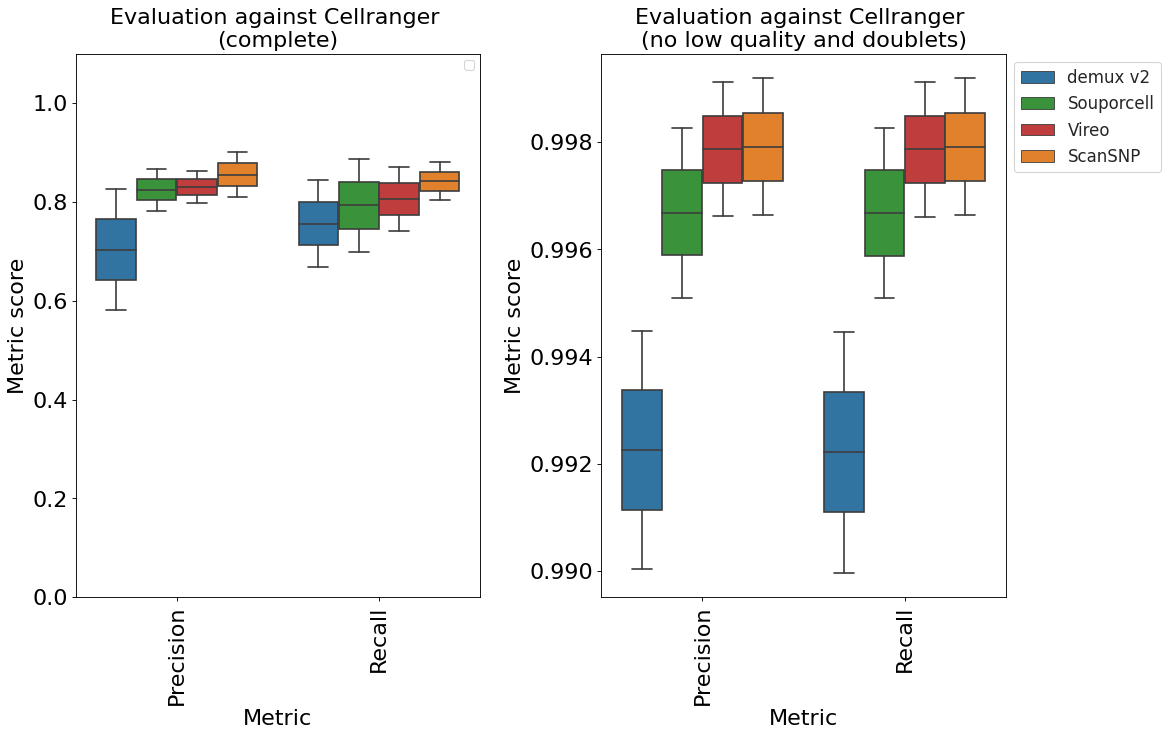

In [14]:
fig, ax = plt.subplots(1,2, figsize = (15,9), gridspec_kw={'wspace': 0.3})

sns.set_theme(style = 'whitegrid')

sns.boxplot(data = complete_data, x = 'Metric', y = 'CellRanger', hue = 'Method', ax=ax[0], palette=colors_dict)
sns.boxplot(data = no_neg_no_d_data, x = 'Metric', y = 'CellRanger_no_negative_no_doublet', hue = 'Method', ax=ax[1], palette = colors_dict_ndd)
xlabels = ['Precision', 'Recall']
ax[0].set_xticklabels(xlabels, rotation=90)
ax[0].set_title('Evaluation against Cellranger \n(complete)', fontsize = 20)
ax[1].set_xticklabels(xlabels, rotation=90)

ax[1].set_title('Evaluation against Cellranger \n(no low quality and doublets)', fontsize = 20)
handles, _ = ax[0].get_legend_handles_labels()
handles_nnd, _ = ax[1].get_legend_handles_labels()
_ = ax[0].legend('')
_ = ax[1].legend(handles_nnd, labels_nnd, fontsize = 15, bbox_to_anchor = (1,1))

_ = ax[0].set_ylim(0,1.1)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
_ = ax[0].set_ylabel('Metric score', fontsize = 20)
_ = ax[1].set_ylabel('Metric score', fontsize = 20)
_ = ax[0].set_xlabel('Metric', fontsize = 20)
_ = ax[1].set_xlabel('Metric', fontsize = 20)

plt.savefig('./figures/PrecisionRecall_noConsensus.svg', bbox_inches = 'tight')

# Plot doublets rate

In [15]:
labels = ['sample1', 'sample2']

In [16]:
DS

,Sample,Method,Doublet_Rate,Unassigned_rate
0,sample1,Demuxlet,0.250671,0.000000
1,sample1,SCanSNP,0.107736,0.000000
2,sample1,SoC,0.224203,0.027923
3,sample1,Vireo,0.179362,0.079130
4,sample1,Consensus,0.176907,0.059985
5,sample2,Demuxlet,0.252423,0.000000
6,sample2,SCanSNP,0.085330,0.000000
7,sample2,SoC,0.195369,0.030687
8,sample2,Vireo,0.163025,0.086585
9,sample2,Consensus,0.145648,0.061775


<ipython-input-17-8eb50ae73dda>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax[0].set_xticklabels(labels, rotation=90, fontsize = 20)
<ipython-input-17-8eb50ae73dda>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax[1].set_xticklabels(labels, rotation=90, fontsize = 20)


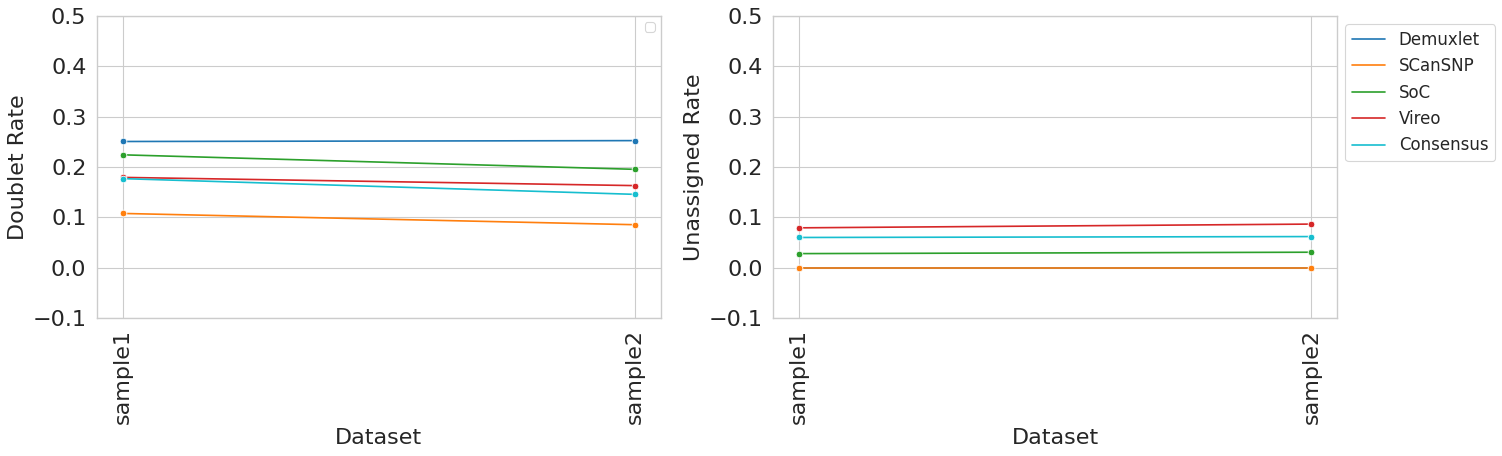

In [17]:
fig, ax = plt.subplots(1,2, figsize = (20,5))

sns.lineplot(data = DS, x = 'Sample', y = 'Doublet_Rate', hue = 'Method', ax = ax[0], marker='o', palette=colors_dict_lineplot)
sns.lineplot(data = DS, x = 'Sample', y = 'Unassigned_rate', hue = 'Method', ax = ax[1], marker='o', palette=colors_dict_lineplot)

ax[0].set_xlabel('Dataset', fontsize = 20)
ax[0].set_ylabel('Doublet Rate', fontsize = 20)
ax[0].set_ylim(-0.1,0.5)
_ = ax[0].legend('')

ax[1].set_xlabel('Dataset', fontsize = 20)
ax[1].set_ylabel('Unassigned Rate', fontsize = 20)
ax[1].set_ylim(-0.1,0.5)
ax[1].legend(loc='upper left', fontsize = 15, bbox_to_anchor = (1,1))
_ = ax[0].set_xticklabels(labels, rotation=90, fontsize = 20)
_ = ax[1].set_xticklabels(labels, rotation=90, fontsize = 20)

ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

plt.savefig('./figures/DS_Rates.svg', bbox_inches = 'tight')

# Plot SoupX results

In [18]:
soupx = pd.read_csv('../../SoupX.csv', index_col = 0)
soupx['Sample'] = ['sample1', 'sample2']

soupx = soupx[soupx.Sample.isin(['sample1', 'sample2'])]

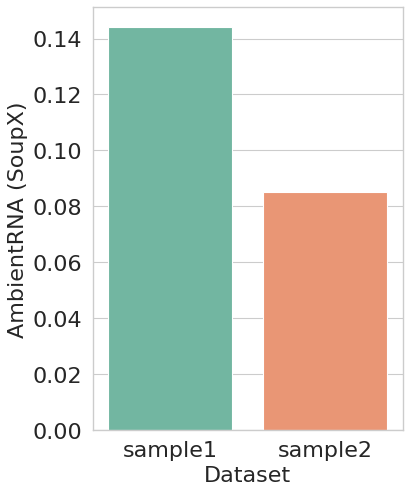

In [19]:
sns.set_theme(style = 'whitegrid')

fig, ax = plt.subplots( figsize = (5,7))

sns.barplot(data = soupx, x = 'Sample', y = 'contamination', ax = ax, palette = 'Set2')

ax.set_ylabel('AmbientRNA (SoupX)', fontsize = 20)
ax.set_xlabel('Dataset', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.savefig('./figures/SoupX.svg', bbox_inches = 'tight')

# Plot log1p of total counts

In [20]:
log1p_df = pd.read_csv('../../log1p_tot_counts.csv', index_col = 0)

In [21]:
log1p_df = log1p_df.reset_index().melt(id_vars='index')
log1p_df

,index,variable,value
0,sample1,0,9.391244
1,sample2,0,7.003974
2,sample1,1,9.595534
3,sample2,1,8.107118
4,sample1,2,10.135947
...,...,...,...
43437,sample2,21718,NaN
43438,sample1,21719,7.100852
43439,sample2,21719,NaN
43440,sample1,21720,8.010692


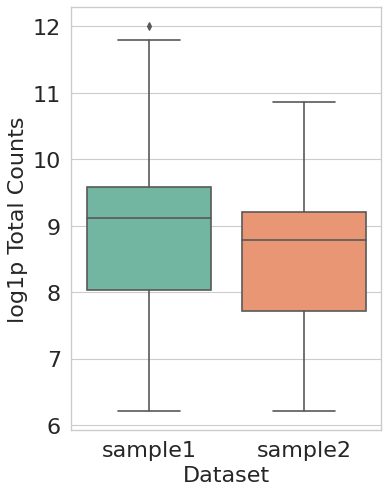

In [22]:
sns.set_theme(style = 'whitegrid')

fig, ax = plt.subplots( figsize = (5,7))

sns.boxplot(data = log1p_df, x = 'index', y = 'value', ax = ax, palette = 'Set2')

ax.set_ylabel('log1p Total Counts', fontsize = 20)
ax.set_xlabel('Dataset', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.savefig('./figures/log1p_tot_counts.svg', bbox_inches = 'tight')